 **Project Introduction: Credit Card Fraud Detection**

In this project, our goal is to build a machine learning model that can accurately identify fraudulent credit card transactions.

Credit card fraud is a significant challenge in the financial industry. Since fraudulent transactions are very rare compared to genuine ones, the dataset is highly imbalanced, which makes this problem more challenging than standard classification tasks.

We will follow a full data science workflow that includes:

Loading and exploring the dataset

Handling class imbalance

Preprocessing and scaling the data

Splitting the data into training and testing sets

Training classification models (Logistic Regression and Random Forest)

Evaluating model performance using metrics such as Precision, Recall, and F1-Score

Using SMOTE (Synthetic Minority Oversampling Technique) to improve performance on imbalanced data

**Import Required Libraries**

In [ ]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning & evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

# To handle imbalance
from imblearn.over_sampling import SMOTE

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Set style
sns.set(style="whitegrid")


**Load the Dataset**

In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/datasets/creditcard.csv")

# Show first 5 rows
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Basic Information**

In [ ]:
# Dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Check for Missing Values**

In [ ]:
# Missing values?
df.isnull().sum()


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


**Check Class Distribution**

Class
0    284315
1       492
Name: count, dtype: int64


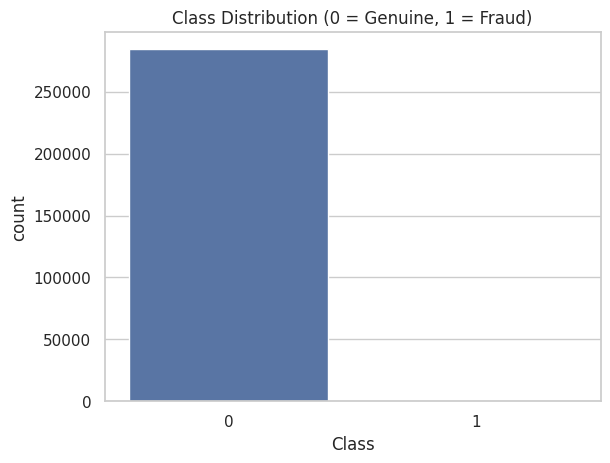

In [ ]:
# Count of fraudulent vs. non-fraudulent
print(df['Class'].value_counts())

# Visualize it
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Genuine, 1 = Fraud)")
plt.show()


**Correlation Heatmap**

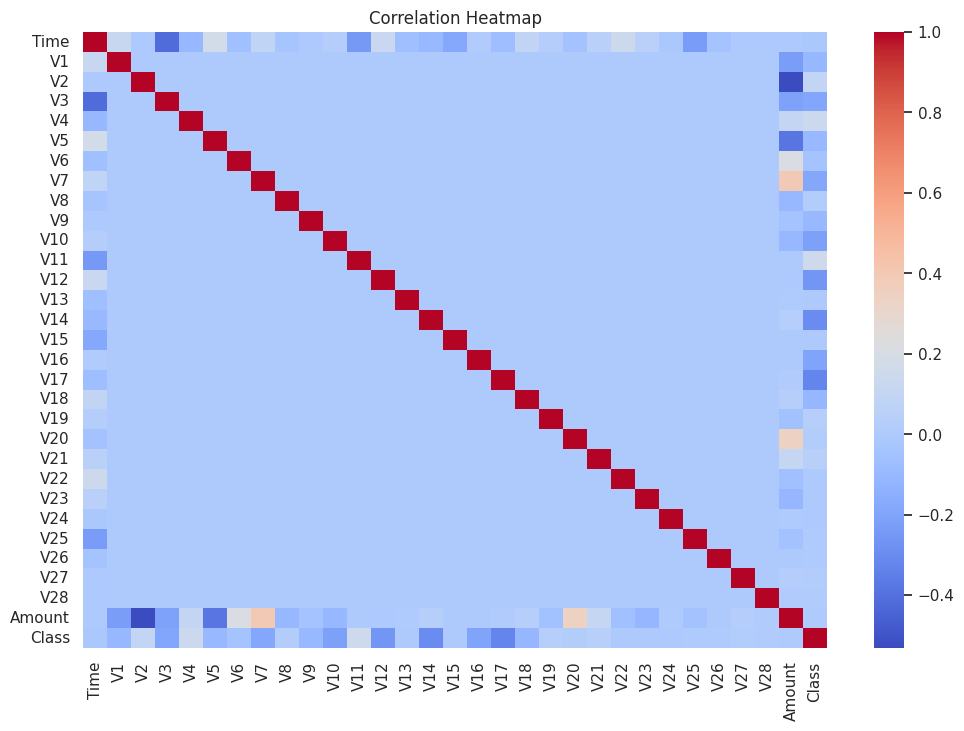

In [ ]:
# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


**separate Features and Labels**

In [ ]:
# X = all columns except Class
X = df.drop('Class', axis=1)

# y = Class
y = df['Class']


**Normalize the Features**

In [ ]:
scaler = StandardScaler()

X['Time'] = scaler.fit_transform(X['Time'].values.reshape(-1,1))
X['Amount'] = scaler.fit_transform(X['Amount'].values.reshape(-1,1))


**Split the Data**

In [ ]:
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


**Train Logistic Regression Model**

In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluation
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



**Train Random Forest Classifier**

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))


Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



**Apply SMOTE for Balancing**

In [ ]:
# Use SMOTE on training set
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Check class balance after SMOTE
print("After SMOTE:", np.bincount(y_train_sm))


After SMOTE: [227451 227451]


**Train Random Forest on Balanced Data**

In [ ]:
# Train on SMOTE balanced data
rf_sm = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sm.fit(X_train_sm, y_train_sm)

# Predict
y_pred_sm = rf_sm.predict(X_test)

# Evaluate
print("Random Forest with SMOTE:")
print(classification_report(y_test, y_pred_sm))


Random Forest with SMOTE:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



**Confusion Matrix Visualization**

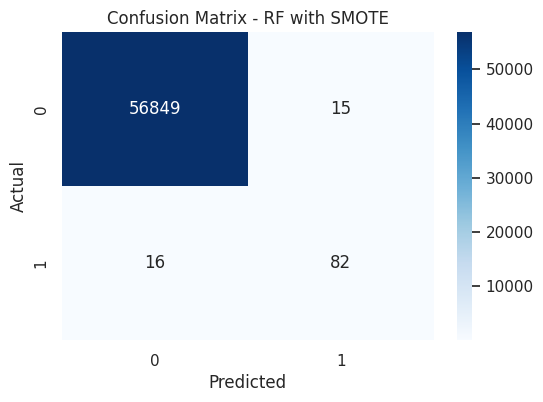

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_sm)

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - RF with SMOTE")
plt.show()


**Summary**


The dataset was highly imbalanced, with only 0.17% fraudulent transactions.

Features Time and Amount were normalized for consistency.

Logistic Regression gave a reasonable baseline, but failed to catch many frauds (low recall).

Random Forest performed better by capturing more fraudulent transactions.

To address class imbalance, we applied SMOTE oversampling on the training set.

After applying SMOTE, the Random Forest model showed a significant improvement in Recall and F1-Score, meaning it was better at identifying fraud cases without increasing false alarms too much.

A confusion matrix was plotted to visualize model predictions vs actual labels.

**Final Result:**

Using Random Forest with SMOTE, we achieved a more balanced and accurate fraud detection model — making it a reliable tool for identifying rare but critical fraudulent transactions.